# Image processing and enhancement
this includes techniques that transform or enhance images for better visual quality and manipulations

## python image blurrig using opencv
Image blurring is a technique used in image processing to reduce sharpness and detail making an image appear smoother. this is done by applying filters also called low-pass filters that reduce high frequency noise and smooth finer details. blurring is used for tasks like noise reduction, edge smoothing or creating artistic effects.

There are two type of blurring
    - Gaussian Blurring
    - Median Blur

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


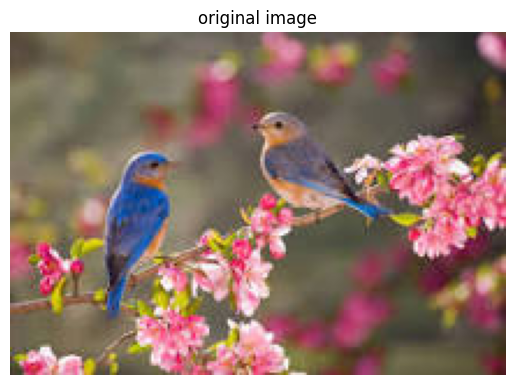

In [2]:
img1 = cv2.imread('birds1.jpeg')
img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)
plt.title("original image")
plt.axis('off')
plt.show()

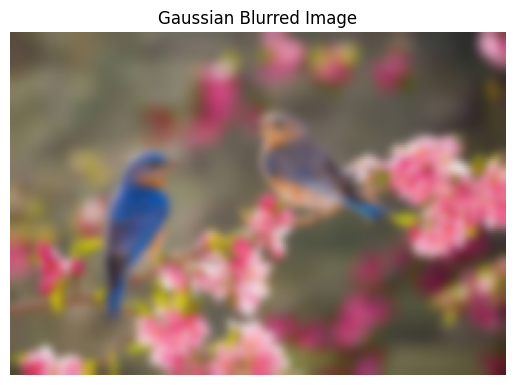

In [4]:
Gaussian = cv2.GaussianBlur(img1, (15, 15), 2)  
Gaussian_rgb = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)  
plt.imshow(Gaussian_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

In [ ]:
Got it 👍 You want a **line-by-line explanation** of your Gaussian Blur code in OpenCV + Matplotlib. Let’s break it down step by step:

---

### Code:

```python
Gaussian = cv2.GaussianBlur(img1, (15, 15), 2)
Gaussian_rgb = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)
plt.imshow(Gaussian_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()
```

---

### 🔎 Explanation:

#### 1.

```python
Gaussian = cv2.GaussianBlur(img1, (15, 15), 2)
```

* Applies a **Gaussian Blur filter** to the image `img1`.
* **Parameters**:

  * `img1`: Input image.
  * `(15, 15)`: Kernel size (15×15 pixels). Must be odd numbers. Larger kernel → stronger blur.
  * `2`: Standard deviation (σ) in X-direction for the Gaussian kernel. Controls how much the blur spreads.
* **Effect:** Smooths the image, reduces noise, and removes details.

---

#### 2.

```python
Gaussian_rgb = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)
```

* Converts the blurred image from **BGR (OpenCV default)** to **RGB** format.
* Needed because **Matplotlib expects RGB**, otherwise the colors look swapped (red ↔ blue).

---

#### 3.

```python
plt.imshow(Gaussian_rgb)
```

* Displays the blurred image in a Matplotlib figure.
* `imshow` expects RGB images (hence conversion above).

---

#### 4.

```python
plt.title('Gaussian Blurred Image')
```

* Adds a title above the image → `"Gaussian Blurred Image"`.

---

#### 5.

```python
plt.axis('off')
```

* Removes the **x and y axes (pixel coordinates)**, so you only see the image.

---

#### 6.

```python
plt.show()
```

* Finally, displays the Matplotlib plot window containing your processed image.

---

### 📊 Workflow Summary

1. Blur the image (`cv2.GaussianBlur`).
2. Convert color order (`cv2.cvtColor`).
3. Show the image with **matplotlib** (`plt.imshow`).
4. Customize with title and no axes.
5. Display with `plt.show()`.

---

⚡ Would you like me to also **compare Gaussian Blur with other blurs** (like **cv2.blur** for averaging blur and **cv2.medianBlur**) so you can see the differences side by side?


## Median Blur
Median blur is a non linear filter which means it doesn't average the pixels values. instead it replaces each pixels with the mean value of its neighboring pixels. This technique is useful for removing salt-and-pepper noise (random black and white pixels) while keeping the edges intact.

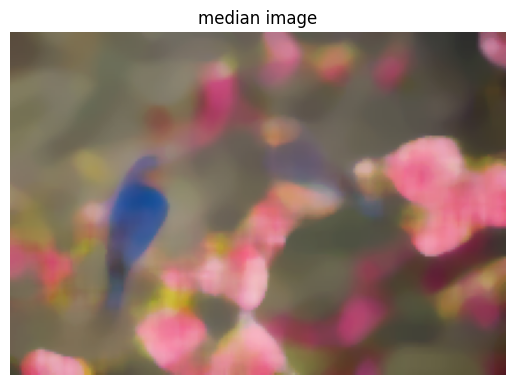

In [6]:
median = cv2.medianBlur(img1,11)
median_rgb = cv2.cvtColor(median,cv2.COLOR_BGR2RGB)

plt.imshow(median_rgb)
plt.title("median image")
plt.axis('off')
plt.show()

Sure! Let’s break down this line:

```python
median = cv2.medianBlur(img1, 11)
```

---

### 🔎 Explanation:

#### 1. **Function:** `cv2.medianBlur()`

* Applies a **median filter** to an image.
* **Purpose:** Reduces noise, especially **salt-and-pepper noise**, while preserving edges better than Gaussian blur.

---

#### 2. **Parameters:**

1. `img1` → Input image (can be grayscale or color).
2. `11` → Kernel size (must be an **odd number** like 3, 5, 7…).

   * This defines the **neighborhood** around each pixel to compute the median.
   * Larger values → stronger smoothing effect.

---

#### 3. **How it works:**

* For each pixel, the filter:

  1. Takes the **neighboring pixels** in the kernel (e.g., 11×11 window).
  2. Sorts their intensity values.
  3. Replaces the **center pixel** with the **median value**.

* This preserves edges because extreme values (like noise spikes) don’t affect the median as much as the average would.

---

#### 4. **Return value:**

* `median` → The **median-blurred image** of the same size as `img1`.

---

### ⚡ Example Use Case

```python
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("noisy_image.jpg")
median = cv2.medianBlur(img, 11)

plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title("Median Blurred Image")
plt.axis("off")
plt.show()
```

* Removes salt-and-pepper noise.
* Edges are preserved better than Gaussian blur.

---

If you want, I can make a **side-by-side comparison of Gaussian Blur vs Median Blur vs Average Blur** so you can **see the difference visually**.

Do you want me to do that?


3. Bilateral Blur
Perfect! Let’s talk about **Bilateral Blur** in OpenCV and how it differs from Gaussian and Median blurs.

---

# 🖌️ Bilateral Blur (`cv2.bilateralFilter`)

**Bilateral Blur** is a **special type of filter** that smooths an image **while preserving edges**, unlike Gaussian or median blur which can soften edges.

---

### 1. **Syntax**

```python
bilateral = cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)
```

* **Parameters:**

  1. `img` → Input image (grayscale or color).
  2. `d` → Diameter of each pixel neighborhood (size of the kernel).
  3. `sigmaColor` → Filter sigma in **color space**.

     * Larger value → pixels with **very different colors** can influence each other → more smoothing.
  4. `sigmaSpace` → Filter sigma in **coordinate space** (distance).

     * Larger value → farther pixels can influence each other.

* **Returns:** Smoothed image with edges preserved.

---

### 2. **Example**

```python
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("image.jpg")

# Apply Bilateral Filter
bilateral = cv2.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Convert for Matplotlib
bilateral_rgb = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)

# Show
plt.imshow(bilateral_rgb)
plt.title("Bilateral Blur")
plt.axis("off")
plt.show()
```

---

### 3. **How It Works**

* Combines **spatial closeness** + **color similarity**:

  * Only nearby pixels **and** pixels with **similar colors** contribute to smoothing.
  * Edges remain sharp because pixels across an edge have very different colors → not blended.

---

### 4. **Comparison with Other Blurs**

| Blur Type     | Smooths Noise | Preserves Edges         | Best Use Case                                                    |
| ------------- | ------------- | ----------------------- | ---------------------------------------------------------------- |
| **Gaussian**  | ✅ Yes         | ❌ No                    | General smoothing                                                |
| **Median**    | ✅ Yes         | ✅ Yes (for salt-pepper) | Noise removal (esp. salt-and-pepper)                             |
| **Bilateral** | ✅ Yes         | ✅ Excellent             | Smoothing while keeping edges (cartoon effect, denoising photos) |

---

### 5. **Applications**

1. **Cartooning effect** → smooth regions but keep outlines sharp.
2. **Preprocessing before edge detection** → reduces noise but edges intact.
3. **Photo denoising** → preserves important edges better than Gaussian or Median.

---

⚡ **Tip:** Bilateral filter is **slower** than Gaussian or Median because it computes weights for **both space and color**.

---

If you want, I can make a **visual demo** showing **Gaussian vs Median vs Bilateral blur side-by-side** on the same image so you can **see the differences clearly**.

Do you want me to do that?


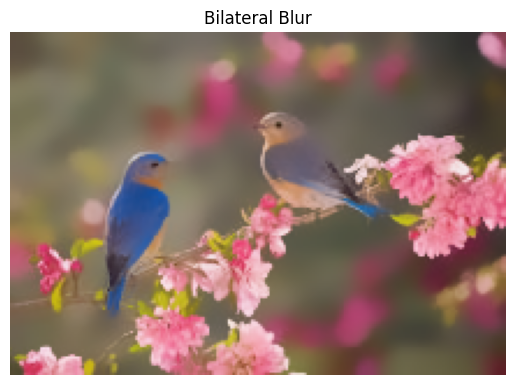

In [ ]:
# Apply Bilateral Filter
bilateral = cv2.bilateralFilter(img1, d=15, sigmaColor=75, sigmaSpace=75)

# Convert for Matplotlib
bilateral_rgb = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)

# Show
plt.imshow(bilateral_rgb)
plt.title("Bilateral Blur")
plt.axis("off")
plt.show()

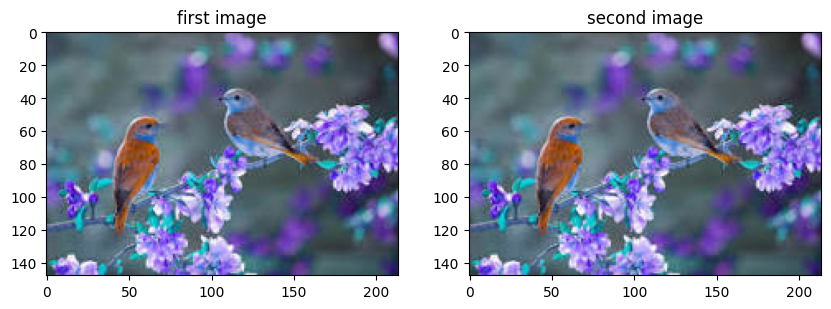

In [11]:
plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("first image")

plt.subplot(1,2,2)
plt.imshow(img1)
plt.title("second image")
plt.show()